In [1]:
import numpy as np 
from numpy.linalg import solve
import matplotlib.pyplot as plt
import pandas as pd 

In [11]:
#Importing the Data
#set 1: x=0, y=1 in data.csv
#set 2: x=2, y=3 in data.csv
#set 3: x=4, y=5 in data.csv
#set 4: x=6, y=7 in data.csv


data = pd.read_csv('data.csv')
x = data.iloc[:, 2]
y = data.iloc[:, 3]

In [12]:
degree = 4
n = len(x)

In [13]:
X = np.ones((n,degree+1))
print(X)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [14]:
# Fill in columns 2-4 with our predictors.
for i in range(1,degree+1): #iterate through our columns 
    for j in range(0,n): #iterate through our rows 
        X[j,i] = x[j]**i
print(X)


[[ 1.     -2.      4.     -8.     16.    ]
 [ 1.     -1.      1.     -1.      1.    ]
 [ 1.      0.9     0.81    0.729   0.6561]
 [ 1.      1.      1.      1.      1.    ]
 [ 1.      2.      4.      8.     16.    ]]


In [15]:
XT = np.transpose(X)
y = np.asarray(y)

In [16]:
B = (np.linalg.inv(XT.dot(X))).dot(XT).dot(np.transpose(y))
print(B)
print(B.shape)

[ 1.75943031  0.07701667 -2.22889622  0.03443333  0.69891591]
(5,)


Text(0.5, 1.0, 'Least Squares through Normal Equation')

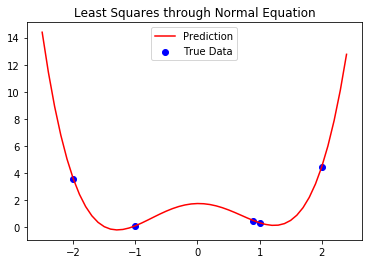

In [17]:
#plotting our fit
%matplotlib inline

plt.scatter(x,y,color='blue', label = "True Data")
# add in the line!!!
plotx = np.arange(-2.5, 2.5, 0.1)
ploty = B[0] + B[1]*(plotx) + B[2]*(plotx**2) + B[3]*(plotx**3)+ B[4]*(plotx**4)
plt.plot(plotx,ploty, color ="red", label = "Prediction")
plt.legend()
plt.title("Least Squares through Normal Equation")

In [18]:
#Starting the testing process
testdata = pd.read_csv('valz.csv')
testx = testdata.iloc[:, 1]
testy = testdata.iloc[:, 2] 

In [19]:
yhat =  B[0] + B[1]*(testx) + B[2]*(testx**2) + B[3]*(testx**3)+ B[4]*(testx**4)
error = np.linalg.norm((testy-yhat))
print(error)

23.297538454644545
